In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
# Functions

def exclude_from_list(df, exclude_list, column_name='Name'):
    remove_index = df[df[column_name].isin(exclude_list)].index
    return df.drop(remove_index, axis=0)


Performances of Models from models.csv

In [4]:
# Visulize the performances of models
performances = pd.read_csv('../models/models.csv')
performances

,Name,kappa,recall,f1,precision,epochs,Parameters
0,MemeClassConv2d,0.878049,0.918605,0.940476,0.918605,40,"[['conv1.weight', torch.Size([6, 3, 5, 5])], [..."
1,MemeClassConv2dV2,0.817073,0.913580,0.907975,0.913580,40,"[['conv1.weight', torch.Size([3, 1, 5, 5])], [..."
2,MemeClassConv2d,0.865854,0.890110,0.936416,0.890110,40,"[['conv1.weight', torch.Size([6, 3, 5, 5])], [..."
3,MemeClassConv2d,0.768293,0.811881,0.896175,0.811881,25,"[['conv1.weight', torch.Size([6, 3, 5, 5])], [..."


Mean KAPPA score per Model class

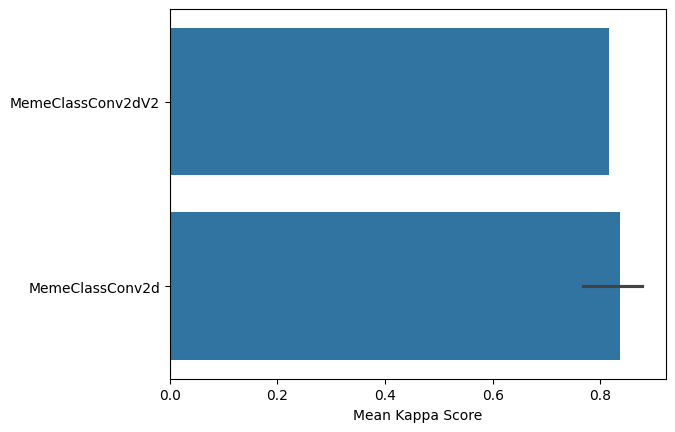

In [8]:
filter = exclude_from_list(performances, ["MemeClassConv2dEpchTst"])

mean_score = filter[['Name', 'kappa']]
order = filter[['Name', 'kappa']].groupby('Name').agg('mean').reset_index().sort_values('kappa')

fig, ax  = plt.subplots(1,1)
ax = sns.barplot(x=mean_score['kappa'], y=mean_score['Name'], order=order['Name'])

ax.set_xlabel('Mean Kappa Score')
ax.set_ylabel('')

plt.show()

Kappa Per Epoch

,Name,Kappa,Epoch
11,MemeClassConv2dEpchTst,0.56250,1
12,MemeClassConv2dEpchTst,0.75000,15
13,MemeClassConv2dEpchTst,0.78125,30
14,MemeClassConv2dEpchTst,0.75000,5
15,MemeClassConv2dEpchTst,0.65625,5
16,MemeClassConv2dEpchTst,0.78125,5
17,MemeClassConv2dEpchTst,0.78125,1
18,MemeClassConv2dEpchTst,0.65625,1
19,MemeClassConv2dEpchTst,0.75000,10
20,MemeClassConv2dEpchTst,0.78125,10


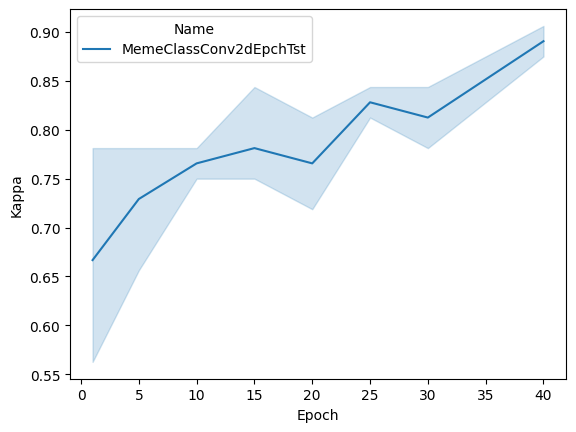

In [112]:
filter = exclude_from_list(performances, ['MemeClassifier', 'MemeClassConv2d', 'efficientnet_b0'])

kappa_epoch = filter[['Name', 'Score', 'Epoch#']]
kappa_epoch.columns = ['Name', 'Kappa', 'Epoch']
display(kappa_epoch)

fig, ax = plt.subplots(1,1)
ax = sns.lineplot(y=kappa_epoch['Kappa'], x=kappa_epoch['Epoch'], hue=kappa_epoch['Name'])

plt.show()